# Travail Pratique 4

<div class="alert alert-block alert-success">
<b>Informations générales </b>
</div>

**Professeur**: Stephan Robert

**Assistant(s)**: Félicien Hêche

**Contact**: stephan.o.robert@gmail.com, felicien.heche@gmail.com ou via Teams

**Rendu**:

- Modalité: Travail individuel. Une fois complétées, copiez les réponses dans le ficher "**TP4_APV_S1-2023_Nom_Prenom.*****" (*** = ce que vous voulez qui soit lisible pour nous: .pdf, .html, ...) en remplaçant Nom et Prénom par les votres puis uploader votre fichier sur Cyberlearn.
- Note: Ce TP est noté sur 6, pour un poids de x%

**Étudiant**:

- Prénom Nom

<div class="alert alert-block alert-success">

<b>But du TP </b>
</div>

Le but de travail pratique est de montrer comment il est possible de générer des variables aléatoires en partant d'une variable aléatoire uniforme sur $[0, 1]$.


<!---
<div class="alert alert-block alert-info">
<b>Rappel </b>
</div>
-->

<div class="alert alert-block alert-success">
<b>Table des matières </b>
</div>

Exercice 1
>* Loi uniforme

Exercice 2
>* Loi exponentielle
>* Loi de Cauchy

Exercice 3
>* Première méthode
>* Seconde méthode
>* Troisième méthode
>* Quatrième méthode
>* Comparaison du temps de calculs

Exercice 4
>* Loi Normale

Exercice 5
>* Approximation de la loi de Poisson par une loi binomiale

Exercice 6
>* Méthode de Monte Carlo





## Exercice 1

Pour commencer, et comme d'habitude, commençons par importer quelques packages.

In [1]:
import numpy as np
import math
import matplotlib as mpl
import pandas
import matplotlib.pyplot as plt
from matplotlib import rc
from time import time
from scipy.stats import gaussian_kde

Pour simuler une suite de variables aléatoires indépendantes et uniformes sur $[0, 1]$, Python génére des entiers alétoires indépendants uniformes dans un ensemble $E = \{1, 2, \ldots \}$ puis les divise par $M$.

Pour faire cela, Python génère une suite de nombres pseudo-aléatoires en partant d'un état $x_{0}$ (la graine ou 'seed') et applique successivement une même fonction $f \text{ : } E \rightarrow E$. Typiquement, $f$ est de la forme $f(x) = ax + c$ modulo $M$ avec $a$ et $c$ bien choisis. Evidemment, ce processus, doit vérifier certaines propriétés afin d'être sûr que la suite générée "ressemble" à une suite de variables aléatoires uniformes et indépendantes sur $E$.

Dans ce travail pratique, nous allons donc supposer que nous avons à dispostion une "boîte noire" qui permet de simuler une suite de variables aléatoires indépendantes uniformes sur $[0, 1]$. Le code ci-dessous montre comment nous pouvons générer une telle suite de variables aléatoires. Remarquons qu'il est également possible de choisir la graine utilisée par Python. Cela peut être utile afin de garantir la reproductibilité de certains travaux scientifiques par exemple. 

In [2]:
print('#'*40)
print('Before fixing the seed, we obtain')
print('#'*40)
print(np.random.rand())
print(np.random.rand())


print('#'*40)
print('After fixing the seed, we obtain')
print('#'*40)

np.random.seed(seed=1)
print(np.random.rand())
print(np.random.rand())

np.random.seed(seed=1)
print(np.random.rand())
print(np.random.rand())


########################################
Before fixing the seed, we obtain
########################################
0.25309948344791433
0.17078686101674823
########################################
After fixing the seed, we obtain
########################################
0.417022004702574
0.7203244934421581
0.417022004702574
0.7203244934421581


### 1.1 Loi uniforme

Soient $a, b \in \mathbb{R}$ avec $a < b$ et $U$ une variable aléatoire uniforme sur $[0, 1]$. Il est possible de montrer que $a + (b- a)U$ suit une loi uniforme sur $[a, b]$. 

En utilisant le générateur aléatoire décrit ci-dessus, simulez une variable aléatoire uniforme sur $[a, b]$

In [3]:
def va_uniform(a, b):
    """
    Simule une variable aléatoire sur [a, b]
    
    Return: un nombre choisi aléatoirement uniformément entre a et b
    """
    # TODO: implement this function

Pour vérifier que l'implémentation de la variable aléatoire a le comportement souhaité, nous pouvons générer un grand nombre de donné en utilisant notre fonction et tracer le l'histogramme obtenu.

In [ ]:
n_data = 100000
a = 3
b = 10
# TODO: plot the empirical density of 'n_data' point generated using the function 'va_uniform'

## Exercice 2 

Plus généralement, il est possible d'utiliser une méthode suivante pour générer une variable aléatoire. 

Supposons que $X$ est une variable aléatoire réelle et que sa fonction de répartiont $F$ est strictement croissante. Alors en notant $U$ la loi uniforme sur $[0, 1]$, on obtient que $F^{-1}(U)$ suit la même loi que $X$.

### 2.1 Loi exponentielle

En utilisant la méthode de simulation par inversion de la fonction de répartion comme décrite ci-dessus, simulez une variable aléatoire exponentielle.

Rappelons que la loi exponentielle de paramètre $\lambda > 0$ a pour fonction de densité $\lambda e^{- \lambda x}$ pour $x > 0$ et zéro sinon. La fonction de répartion de la loi exponentielle est donnée par $(1 - e^{- \lambda x})$ pour $x > 0$ et $0$ sinon.

In [5]:
# TODO: Vérifier que la fonction de répartition est bien croissante et calculer F^{-1}.

In [6]:
def va_exponentielle(lamb):
    """
    Simule une variable aléatoire exponentielle de paramètre lamb.
    """
    # TODO: implement this function

Evidemment, il est toujours utile de vérifier si notre générateur créé des données qui semble correcte.

In [ ]:
n_data = 10000
lamb = 0.5
# TODO: plot the empirical density of 'n_data' point generated using the function 'va_exponentielle'

### 2.2 Loi de Cauchy

En utilisant la méthode de simulation par inversion de la fonction de répartition, simulez une variable aléatoire de Cauchy.

Rappelons que la loi de Cauchy admet comme fonction de densité
$$
\frac{1}{\pi (1 + x^{2})}
$$
et a pour fonction de répartition
$$
\frac{arctan(x) + \pi/2}{\pi}
$$

In [8]:
# TODO: vérifier que la fonction de répartion est bien croissante et calculer F^{-1}

In [9]:
def va_cauchy():
    """
    Simule variable aléatoire de Cauchy
    """
    # TODO: implement this function

In [ ]:
#  TODO: plot the empirical density of points generated using the function 'va_exponentielle'

## Exercice 3

Dans cet exercice, nous allons comparer plusieurs manières de simuler une variable géométrique de paramètre $p \in (0, 1)$ en partant d'une variable aléatoire uniforme sur $[0, 1]$

### 3.1 Première méthode

Pour simuler une variable aléatoire $X$ à valeurs entière telle que $P(X= i) = p_{i}$ pour tout $i \geq 0$, on tire une variable uniforme $U$ sur $[0, 1]$ et on renvoie l'entier $k$ tel que 
$$
p_{0} + p_{1} + \ldots + p_{k-1} < U < p_{0} + p_{1} +  \ldots p_{k}
$$

In [11]:
def geom_methode_1(p):
    """
    Simule une variable alétoire Géométrique en utilisant la méthode décrite ci-dessus.
    """
    # TODO: implement this function

In [ ]:
n_data = 100000
p=0.2
# TODO: plot the empirical density of n_datat points generated using the function 'geom_methode_1'

### 3.2 Deuxième méthode

La deuxième méthode consiste à tirer des variables aléatoires de Bernoulli de paramètre $p$  et de s'arrêter la première fois qu'on tombe sur $1$.

In [13]:
def bernoulli(p):
    """
    Generate a random variable which follows a Bernoulli distribution.
    
    Specifically, we generate a random number between 0 and 1. If this number is smaller than 'p' the probabilit given in input,
    we return 1. Otherwise, we return 0.
    """
    # TODO: implement this function

In [14]:
def geom_methode_2(p):
    """
    Simule une variable alétoire Géométrique en utilisant la deuxième méthode décrite ci-dessus.
    """
    # TODO: implement this function

In [ ]:
n_data = 100000
p=0.2
# TODO: plot the empirical density of n_datat points generated using the function 'geom_methode_2'

### 3.3 Troisième méthode

La troisième méthode consiste à poser $\lambda = - \frac{1}{ln(1-p)}$ et de renvoyer $\lceil \lambda X \rceil$ où $X$ est une variable aléatoire exponentielle de paramètre $1$.

Rappelons que $\lceil x \rceil $ est le plus petit entier $k$ tel que $k \geq x$.

In [16]:
def geom_methode_3(p):
    """
    Simule une variable alétoire Géométrique en utilisant la troisième méthode décrite ci-dessus.
    """
    # TODO: implement this function

In [ ]:
n_data = 100000
p=0.2
# TODO: plot the empirical density of n_datat points generated using the function 'geom_methode_3'

### 3.4 Quatrième méthode

La dernière méthode consiste tout simplement à utiliser une fonction de numpy.

In [18]:
def geom_methode_4(p):
    """
    Simule une variable alétoire Géométrique en utilisant numpy.
    """
    # TODO: implement this function

In [ ]:
n_data = 100000
p=0.2
# TODO: plot the empirical density of n_datat points generated using the function 'geom_methode_4'

### 3.4 Comparaison du temps de calculs

Pour finir cet exercice, nous allons mesurer le temps qu'il est nécessaire pour générer $10000$ fois la v.a. géométrique en utilisant les différentes méthodes implémentées ci-dessus.

In [22]:
p = 0.1
N = 500000   # Change this value so that the computations takes a few seconds on your machine

In [ ]:
# TODO: compute the time needed to generate N sample using the function geom_methode_1 of parameter p

In [ ]:
# TODO: compute the time needed to generate N sample using the function geom_methode_2 of parameter p

In [ ]:
# TODO: compute the time needed to generate N sample using the function geom_methode_3 of parameter p

In [ ]:
# TODO: compute the time needed to generate N sample using the function geom_methode_4 of parameter p

## Exercice 4

### 4.1 Loi Normale

La méthode de la fonction de répartition inverse ne s'applique pas facilement à la loi normale car sa fonction de répartition et son inverse n'ont pas d'expression analytique simple et efficacement calculable.

Pour simuler des variables aléatoires qui suivent une loi normale, nous utilisons alors une autre méthode appelée méthode de Box-Miller. Si $U_{1}, U_{2}$ sont deux lois uniforme sur l'intervalle $[0, 1]$ alors il est possible de montrer que
$$
X_{1} := \sqrt{-2 ln(U_{1})} sin(2 \pi U_{1}) \sim \mathcal{N}(0, 1) \\
X_{2} := \sqrt{-2 ln(U_{2})} cos(2 \pi U_{2}) \sim \mathcal{N}(0, 1) 
$$

Ensuite pour obtenir une distribution $Y \sim \mathcal{N}(\mu, \sigma^{2})$, il suffit de se souvenir que si $X \sim \mathcal{N}(0, 1)$ alors $Y = \mu + \sigma X \sim \mathcal{N}(\mu, \sigma^{2})$.

In [27]:
def our_gaussienne():
    """
    Simule et retourne deux lois standard normale (i.e. N(0, 1)) en utilisant la méthode de Box-Miller.
    """
    # TODO: implement this function

Nous allons ensuite comparer notre fonction 'our_gaussienne' avec un générateur de v.a. normale produite par numpy.

In [28]:
def official_gaussienne():
    """
    Simule et retourne deux lois normal en utilisant numpy.
    """
    # TODO: implement this function

Ensuite, nous allons générer des données et utilisant 'our_gaussienne' et 'official_gaussienne' et comparer leur distribution empririque.

In [29]:
N = 5000
our_generated_gaussienne = np.stack([our_gaussienne() for _ in range(N)])
official_gaussienne = np.stack([official_gaussienne() for _ in range(N)])

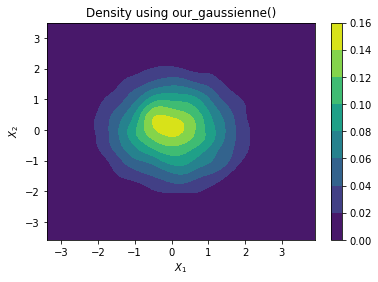

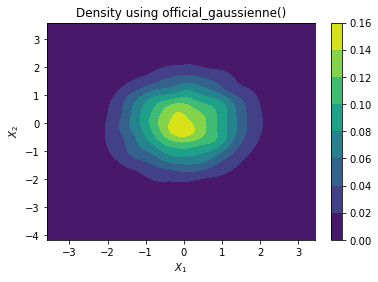

In [30]:
# TODO: plot the emprical density of our_generated_gaussienne and official_gaussienne
# np.meshgrid and the function 'gaussian_kde' from scipy.stats might be useful.


## Exercice 5

### 5.1 Approximation de la loi de Poisson par une loi binomiale

On peut montrer que si $\lambda > 0$ et $X_{n}$ est une variable aléatoire binomiale de paramètre $(n, \lambda/n)$, alors $X_{n}$ converge en loi vers une loi de Poisson de paramètre $\lambda$ lorsque $n \rightarrow \infty$.

En d'autres terme, pour tout $k \geq 0$, $P(X_{n} = k) \rightarrow e^{-\lambda} \lambda^{k}/k!$ pour $n \rightarrow \infty$.

Illustrer graphiquement le résultat présenté ci-dessus.

In [56]:
param = 3
n = 100
N = 5000

In [ ]:
# TODO: generate N samples which follows a binomiale law of parameter (n, param/n) and N sample that follow a Poison
# distribution of paramter 'param'
# Here, you can use function provided by numpy.

In [ ]:
# TODO: plot the empirical density of the two datasets generated above

## Exercice 6

### 6.1 Méthode de Monte Carlo

Considérons un couple $(X, Y)$ de variables aléatoires indépendantes telles que chacune soit uniforme sur $[0, 1]$. Soit $(X_{i}, Y_{i})$ une suite de vecteurs aléatoires indépendants et de même loi que $(X, Y)$.

On admet que $P(X^{2} + Y^{2} \leq 1) = \pi$. Intuitivement, cela fait sens: $(X, Y)$ représente un point uniforme dans le carré $[0, 1]^{2}$ et la probabilité qu'il appartienne à un quart de disque centré en $(0, 0)$ est l'aire de ce quart de disque, ce qui correspond donc à une probabilité de $\pi/4$.

Introduisons maintenant une v.a. $Z_{i}$ qui prend comme valeur $1$ si $X_{i}^{2} + Y_{i}^{2} \leq 1$ et $0$ sinon. Ainsi, les $(Z_{i})$ sont des variables aléatoires indépendantes de Bernoulli de paramètre $\pi/4$.

Posons maintenant
$$
S_{n} := \frac{4}{n} \sum_{i=0}^{n} Z_{i}
$$
D'après la loi forte des grands nombres $S_{n}$ converge presque sûrement vers $\pi$

Nous souhaitons maintenant construire un intervalle de confiance sur la valeur de $\pi$. Pour faire cela, remarquons que
$$
\mathbb{E}[S_{n}] = \pi
$$
et en se rappelant que $x(1-x) \leq 1/4$ sur $[0, 1]$, on trouve encore que
$$
Var(S_{n}) = \frac{16}{n^{2}} \sum_{i=0}^{n} Var(Z_{i}) = \frac{16}{n} \frac{\pi}{4} (1 - \frac{\pi}{4}) \leq \frac{4}{n}
$$

Finalement, en utilisant l'inégalité de Bienaymé-Tchebychev, on obtient
$$
P[ |S_{n} - \pi| \geq \alpha] \leq \frac{4}{\alpha^{2}n}
$$

Utiliser les résultats présentés ci-dessus afin de calculer un intervalle de confiance de $\pi$ d'amplitude au plus $10^{-2}$ avec une probabilité de $99\%$.

In [ ]:
# TODO: compute the minimum 'n' we should consider

In [62]:
# TODO: compute the interval

## Référence

Ce TP est tiré/adapté d’un ”TP Python” de Igor Kortchemski, Ecole Polytechnique,
Probabilités Approfondies, CPES2